In [69]:
import numpy as np
import pandas as pd
data=pd.read_csv("iotid20_processed.csv")
data

,Target,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,...,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,2,9826,9,1,88,0,1,0,1687,0,...,176,0,0,0,0,0,4719,0,87,87
1,2,11192,74,2,18,16,0,483,25,28,...,0,16,189,417,3,1,33,44,2,1
2,0,2999,10,1,5838,0,2,0,0,0,...,2341,0,0,0,0,0,10579,0,4583,4583
3,1,11060,9,1,118,1,0,0,18,0,...,534,0,0,0,0,0,0,0,0,0
4,2,11185,74,2,28,8,0,238,25,28,...,0,8,0,0,0,0,708,313,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261533,0,2311,10,1,3071,0,1,0,0,0,...,2341,0,0,0,0,0,8335,0,2630,2630
261534,2,4,276,1,242,2,0,1754,1126,1151,...,187,2,0,0,0,0,5048,6817,126,114
261535,2,10851,67,2,14,2,0,59,25,28,...,0,2,0,0,0,0,1823,5903,10,2
261536,2,4786,4,1,234,1,0,17,0,17,...,191,1,0,0,0,0,5504,0,233,233


In [70]:
dataset=data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Standardize the data (excluding the target column)
features = dataset.drop(columns=['Target'])  # Assuming 'Target' is the categorical label
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 2. Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(scaled_features)

# 3. Check how much variance each component explains
explained_variance = pca.explained_variance_ratio_
total_variance = sum(explained_variance)

# Print the total variance retained by selected components
print(f'Total Variance Explained: {total_variance:.2f}')

# 4. Transform the data using the selected principal components
pca_data = pd.DataFrame(principal_components)


Total Variance Explained: 0.96


In [71]:
pca_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-3.227442,3.623462,-3.518770,1.647767,1.919065,-0.604967,-0.700347,-1.383422,0.462842,-0.485182,-0.289933,0.482988,-0.264659,0.180296,-0.026833,0.136735
1,-2.153681,-4.995571,2.280726,0.658663,4.630375,1.508473,1.111974,0.364459,0.390088,0.337705,-0.389267,1.179507,2.372615,-0.149782,1.014216,0.011796
2,6.952544,2.788518,0.845397,2.658899,-0.393515,0.008286,-1.157555,3.721536,-0.155376,4.065462,-0.661878,-1.676188,0.465089,-2.221053,-0.652944,-0.583872
3,-0.221666,-2.236775,-2.092082,0.188481,-1.616459,3.105127,2.938922,-1.981830,-4.687964,0.546906,0.114948,-1.279641,0.713472,-0.011543,-0.182976,-0.838924
4,-1.344174,-4.242644,0.268881,-0.557006,1.173350,-0.089336,-0.061116,-0.550773,0.191786,0.315702,0.128453,0.252563,0.181401,-0.732279,0.547377,0.402242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261533,5.608351,1.127087,-0.458629,-0.989226,0.038547,0.168162,-0.109319,0.529503,0.231805,-0.423401,0.861013,0.472000,-0.033785,0.201076,-0.525767,-0.406536
261534,-6.464639,5.351527,3.554163,-3.344202,-0.514653,-1.410879,1.169521,1.955731,-0.820576,-0.085948,0.209744,1.732782,-1.172415,-0.569494,-0.738653,0.308730
261535,-0.843823,-3.608118,-0.383222,-0.286574,-0.417274,-1.003410,-0.346122,-0.736675,0.178350,1.045505,0.092450,-0.015635,0.126455,-0.817593,0.323128,0.277472
261536,0.627391,-1.896258,-1.418630,-0.732453,-1.097661,0.374180,1.400047,-0.084419,0.629819,-0.527325,-1.033112,-0.445519,0.603182,0.818126,-1.191142,-0.140995


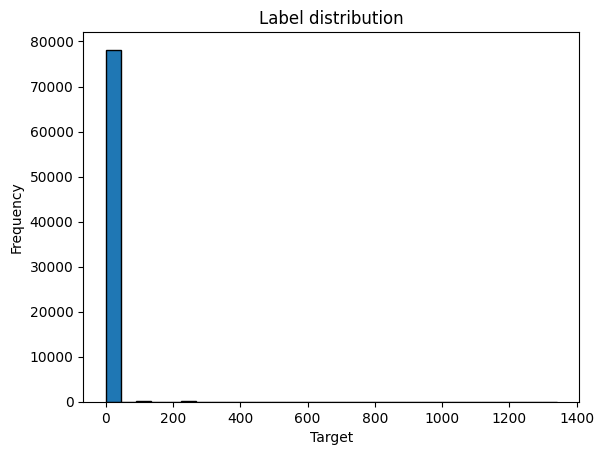

In [65]:
import matplotlib.pyplot as plt

plt.hist(filtered_df["Active_Max"], bins=30, edgecolor='black')

# Thêm nhãn và tiêu đề
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Label distribution')
plt.show()

In [67]:
data=data.drop("Active_Min", axis=1)

In [68]:
data

,Target,Src_Port,Dst_Port,Protocol,Flow_Duration,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,2,9826,9,1,88,0,1687,0,0,0,...,0,0,1,1687,176,0,4719,0,87,87
1,2,11192,74,2,18,483,25,28,31,45,...,16,483,0,25,0,16,33,44,2,1
2,0,2999,10,1,5838,0,0,0,0,0,...,0,0,2,0,2341,0,10579,0,4583,4583
3,1,11060,9,1,118,0,18,0,0,0,...,1,0,0,18,534,0,0,0,0,0
4,2,11185,74,2,28,238,25,28,31,45,...,8,238,0,25,0,8,708,313,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261533,0,2311,10,1,3071,0,0,0,0,0,...,0,0,1,0,2341,0,8335,0,2630,2630
261534,2,4,276,1,242,1754,1126,1151,1159,2167,...,2,1754,0,1126,187,2,5048,6817,126,114
261535,2,10851,67,2,14,59,25,28,31,45,...,2,59,0,25,0,2,1823,5903,10,2
261536,2,4786,4,1,234,17,0,17,19,28,...,1,17,0,0,191,1,5504,0,233,233


In [2]:
unique_elements=[0,1,2,3,4]

In [3]:
filtered_df = pd.DataFrame()
for label in unique_elements:
    # Lọc mẫu và lấy 2000 mẫu đầu tiên cho nhãn này
    label_samples = data[data['Target'] == label].head(16000)
    # Gộp các mẫu này vào filtered_df
    filtered_df = pd.concat([filtered_df, label_samples])

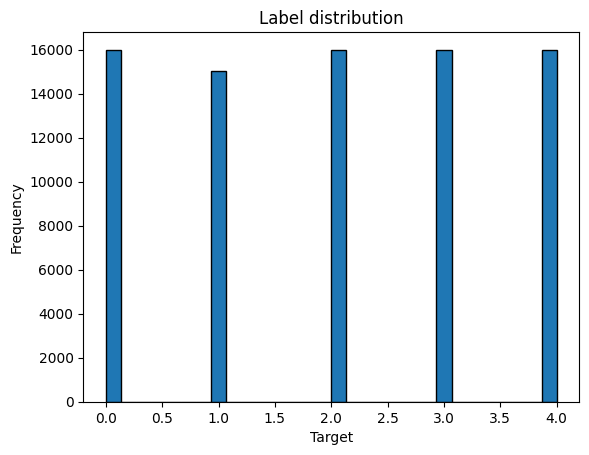

In [4]:
import matplotlib.pyplot as plt

plt.hist(filtered_df["Target"], bins=30, edgecolor='black')

# Thêm nhãn và tiêu đề
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Label distribution')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data_train,data_test=train_test_split(filtered_df, test_size=0.4)

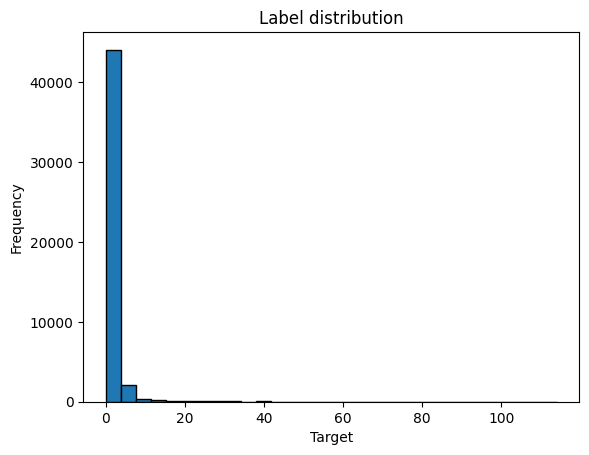

In [56]:
import matplotlib.pyplot as plt

plt.hist(data_train["Tot_Fwd_Pkts"], bins=30, edgecolor='black')

# Thêm nhãn và tiêu đề
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Label distribution')
plt.show()

In [8]:
data_train = data_train.sample(frac=1).reset_index(drop=True)

#define config

In [55]:
data_train

,Target,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,...,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,0,7085,10,1,5337,0,1,0,0,0,...,2341,0,0,0,0,0,10937,0,4896,4895
1,1,10712,9,1,149,1,0,0,0,0,...,1674,0,0,0,0,0,5208,0,148,148
2,3,8002,447,1,162,0,1,0,0,0,...,3365,0,0,0,0,0,5278,0,161,161
3,0,2930,10,1,4210,0,1,0,0,0,...,2341,0,0,0,0,0,9664,0,3770,3770
4,2,10784,67,2,30,4,0,115,25,28,...,0,4,0,0,0,0,1977,4648,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47421,0,7697,10,1,3298,0,1,0,0,0,...,2341,0,0,0,0,0,8619,0,2857,2857
47422,3,8002,447,1,485,0,3,0,0,0,...,3276,0,0,0,0,0,5277,21102,337,69
47423,3,8002,447,1,514,0,3,0,0,0,...,3276,0,0,0,0,0,5333,21404,362,74
47424,3,8002,447,1,476,3,0,1731,1087,1124,...,748,3,0,0,0,0,5259,19633,287,70


In [42]:
import torch
class config():
    def __init__(self):
        self.target_acc=0.75
        self.Gan_epochs=500
        self.noise_size=100
        self.n_features=63
        self.n_classes=5
        self.lrG=0.3
        self.lrD=0.003
        self.epochs=25
        self.classes=5
        self.batch_size=128
        self.G_batch_size=128
        self.GAC_batch_size=128
        self.learning_rate=0.001
        self.IID=False
        self.n_clients=16
        self.criterion=torch.nn.CrossEntropyLoss()
        self.Dropout_rate=0.1
        self.batch_norm=False
        self.synthetic_start_round= 10
        self.n_each_label=9000
conf=config()

In [43]:
print(conf.Gan_epochs)

500


In [44]:
import torch
import DL_model
import DL_model_batch
import sys
import torch.nn as nn
import MyGan as Gan
import os
from torch.utils.data import TensorDataset, DataLoader
import wandb
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import torch.optim as optim
import numpy as np

In [45]:
device=torch.device("cuda:0")
Gan=Gan.CGAN(conf,device)

In [46]:
model=DL_model.Net(0.0,device)

In [47]:
def model_fit(model,data,conf,criterion, round=""):
        if len(data)!=0:
            X=data[:,1:].float()
            y=data[:,:1]
            y=y.squeeze().tolist()
            y=torch.tensor(y).long()
        else:
            X=self.trainset[:,1:].float()
            y=self.trainset[:,:1]
            y=y.squeeze().tolist()
            y=torch.tensor(y).long()
        dataset=TensorDataset(X,y)
        dataloader=DataLoader(dataset, batch_size=128)
        his=model.fit(dataloader,conf.learning_rate,criterion,conf.epochs,f"client {2}",f"round {round}" )
        return his
Tensor=torch.tensor(data_train.values).to(device)
model_fit(model,Tensor,conf,conf.criterion)

accuracy for epoch 0 :  0.8030303120613098
accuracy for epoch 1 :  0.8636363744735718
accuracy for epoch 2 :  0.8636363744735718
accuracy for epoch 3 :  0.8636363744735718
accuracy for epoch 4 :  0.8333333730697632
accuracy for epoch 5 :  0.8787878751754761
accuracy for epoch 6 :  0.8636363744735718
accuracy for epoch 7 :  0.8787878751754761
accuracy for epoch 8 :  0.8484848737716675
accuracy for epoch 9 :  0.8636363744735718
accuracy for epoch 10 :  0.8636363744735718
accuracy for epoch 11 :  0.8787878751754761
accuracy for epoch 12 :  0.8787878751754761
accuracy for epoch 13 :  0.8939394354820251
accuracy for epoch 14 :  0.8030303120613098
accuracy for epoch 15 :  0.9090909361839294
accuracy for epoch 16 :  0.9090909361839294
accuracy for epoch 17 :  0.9090909361839294
accuracy for epoch 18 :  0.8939394354820251
accuracy for epoch 19 :  0.8484848737716675
accuracy for epoch 20 :  0.8939394354820251
accuracy for epoch 21 :  0.8939394354820251
accuracy for epoch 22 :  0.924242436885833

{'loss': [109.26911163330078,
  89.33394622802734,
  76.445556640625,
  85.36592864990234,
  54.636268615722656,
  31.13333511352539,
  21.843164443969727,
  8.597105026245117,
  22.561023712158203,
  25.92836570739746,
  17.55034637451172,
  6.723053932189941,
  14.411993980407715,
  18.304651260375977,
  7.287168979644775,
  9.923820495605469,
  13.50988483428955,
  15.332796096801758,
  18.575817108154297,
  12.180991172790527,
  15.286975860595703,
  7.625196933746338,
  12.103752136230469,
  9.109916687011719,
  11.058114051818848,
  19.248027801513672,
  11.864707946777344,
  7.844303131103516,
  11.558528900146484,
  5.776291847229004,
  6.537668704986572,
  15.650296211242676,
  18.31214714050293,
  7.251457214355469,
  8.913692474365234,
  15.001530647277832,
  7.263049125671387,
  4.609886646270752,
  3.3241631984710693,
  3.9355556964874268,
  6.642818927764893,
  17.210004806518555,
  9.063623428344727,
  9.482958793640137,
  16.14398765563965,
  11.788534164428711,
  4.334

In [54]:
for label in range(5):
    data_labels=data_test[data_test["Target"]==label]
    test_Tensor=torch.tensor(data_labels.values)
    y,X=test_Tensor[:,:1],test_Tensor[:,1:]
    y=y.squeeze()
    y=y.long()
    loss, accuracy, precision,  recall, f1, mcc=model.evaluate(X,y,conf.criterion)
    print(f"accuracy for label {label} : {accuracy}")

accuracy for label 0 : 0.9974945187568665
accuracy for label 1 : 0.6293929815292358
accuracy for label 2 : 0.7163087725639343
accuracy for label 3 : 0.8925204277038574
accuracy for label 4 : 0.8398768305778503


/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/tljh/user/lib/python3.10/site-packages/sklearn/metrics/_

In [51]:
test_Tensor=torch.tensor(data_test.values)
y,X=test_Tensor[:,:1],test_Tensor[:,1:]
y=y.squeeze()
y=y.long()
loss, accuracy, precision,  recall, f1, mcc=model.evaluate(X,y,conf.criterion)

In [52]:
accuracy

0.8176038861274719

In [53]:
loss

0.4794436991214752